In [22]:
# In this notebook we explore properties of fruits such as
# area, roundness, excentricity, and color. Because we are interested
# in the most relevant features of the dataset, we use PCA to reduce
# the dimensionality of the data. We then use a decision tree to
# classify the fruits.

# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data

df = pd.read_csv('Date_Fruit_Datasets.csv')

# And collect the available fruits in the fruits object

fruits = df['Class'].unique()
fruits

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [23]:
# Construct a dictionary to map the fruit names to its corresponding
# dataframes

perclass = {}
for fruit in fruits:
    perclass.update({ fruit : df[df['Class'] == fruit]})

In [24]:
# To keep things simple we will drop the las 25 columns of the dataframe

fruitsdf = df.drop(df.columns[-25:], axis=1)

In [25]:
# We will use this column later to plot the results

fruitclass = df['Class']
fruitclass

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

In [60]:
# We use PCA for dimensionality reduction

pca = PCA(n_components=3)
pca.fit(fruitsdf)
df_pca = pca.transform(fruitsdf)

# Normalizing the df_pca array

df_pca = (df_pca - df_pca.mean()) / df_pca.std()
df_pca

array([[-1.96042563e+00, -4.06392413e-02, -8.35576036e-04],
       [-6.01337946e-01, -4.18735434e-02, -8.38139557e-04],
       [-3.63772649e+00, -5.47250949e-02, -1.67622426e-03],
       ...,
       [ 7.34536532e-01, -2.37188173e-02,  1.09366250e-03],
       [ 9.17222955e-01,  4.10875126e-02, -1.60275499e-05],
       [-7.47024143e-01,  1.16571239e-02,  4.99032030e-04]])

In [62]:
# We add the fruitclass array as the 3 column of df_pca
# but first we need to convert it to a lowercased string

dfp_pca = np.column_stack((df_pca, fruitclass.str.lower()))
dfp_pca


array([[-1.960425628461, -0.04063924133046118, -0.0008355760356707196,
        'berhi'],
       [-0.6013379455335933, -0.04187354341550283,
        -0.0008381395570828743, 'berhi'],
       [-3.6377264927903012, -0.05472509491227022, -0.001676224256484527,
        'berhi'],
       ...,
       [0.7345365323812436, -0.02371881725870773, 0.0010936625027491945,
        'sogay'],
       [0.917222955029592, 0.041087512614828646, -1.6027549870816642e-05,
        'sogay'],
       [-0.7470241429163881, 0.011657123892141992, 0.000499032029687406,
        'sogay']], dtype=object)

In [63]:
# For each fruit in fruits we extract the array from dfp_pca
# and save it to a list

ls = []

for fruit in fruits:
    ls.append(dfp_pca[dfp_pca[:,3] == fruit.lower()])

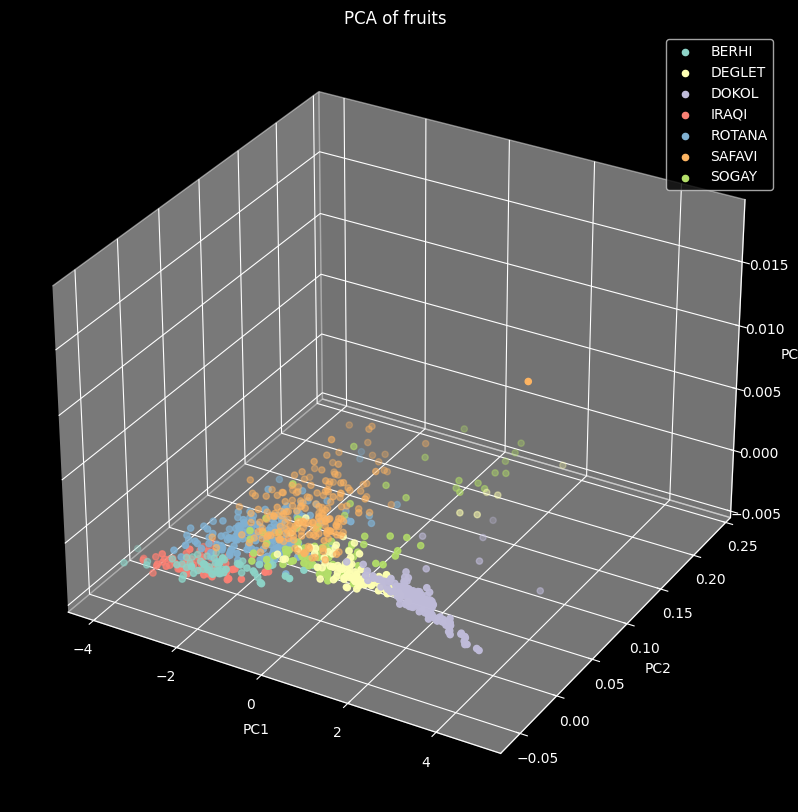

In [64]:
# We plot each fruit in a different color using a 3d plot

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA of fruits')
for i in range(len(fruits)):
    ax.scatter(ls[i][:,0], ls[i][:,1], ls[i][:,2], label=fruits[i])
ax.legend()
plt.show()

In [14]:
# Adding the 

array([[-172831.29111894,   -3582.75899237],
       [ -53014.00472252,   -3691.57516978],
       [-320702.27881079,   -4824.56904918],
       ...,
       [  64756.80353411,   -2091.05295867],
       [  80862.45418355,    3622.27862715],
       [ -65857.7123472 ,    1027.69303959]])

In [10]:
df_pca.shape

(2694,)

Text(0, 0.5, 'AREA')

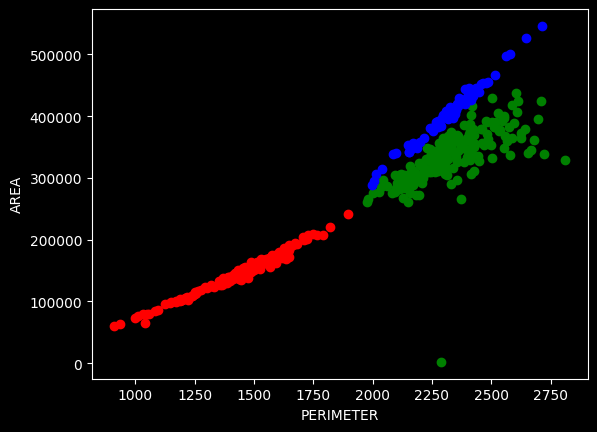

In [4]:
# We can plot three classes of the df
# lets say we choose 'DOKOL', 'SAFAVI' and 'BERHi

import matplotlib.pyplot as plt

prop1 = 'PERIMETER'
prop2 = 'AREA'

X1 = df[df['Class'] == 'DOKOL'][prop1]
Y1 = df[df['Class'] == 'DOKOL'][prop2]

X2 = df[df['Class'] == 'SAFAVI'][prop1]
Y2 = df[df['Class'] == 'SAFAVI'][prop2]

X3 = df[df['Class'] == 'BERHI'][prop1]
Y3 = df[df['Class'] == 'BERHI'][prop2]


plt.scatter(X1, Y1, color='red', label='DOKOL')
plt.scatter(X2, Y2, color='green', label='SAFAVI')
plt.scatter(X3, Y3, color='blue', label='BERHI')
plt.xlabel(prop1)
plt.ylabel(prop2)


In [6]:
properties = df.columns.values

In [7]:
properties

array(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype=object)

In [9]:
# To remove the 'Class' column from the properties

smallprops = properties[:-27]
smallprops

array(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA'], dtype=object)

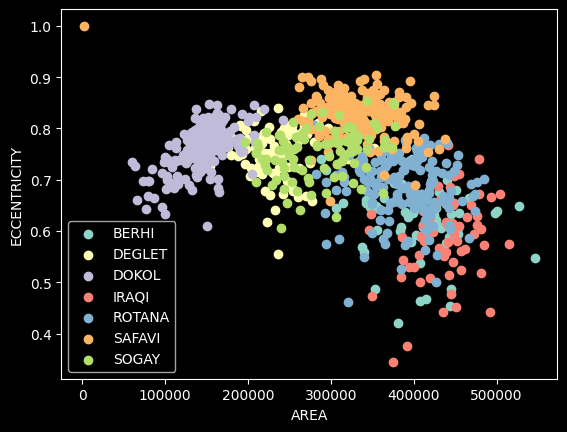

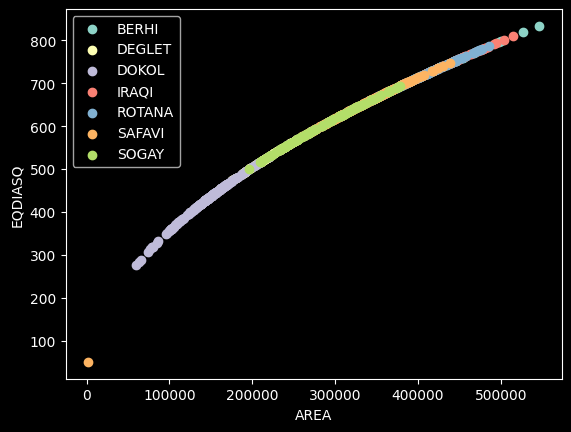

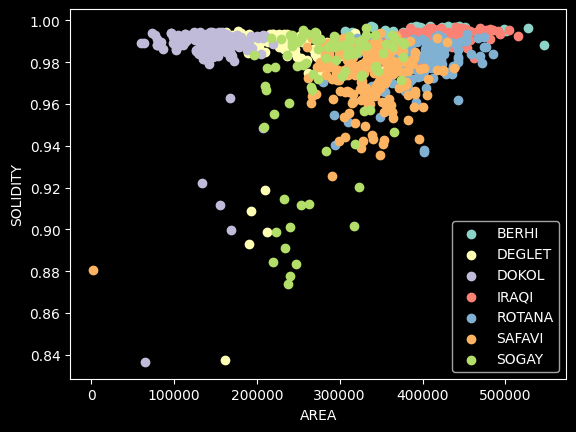

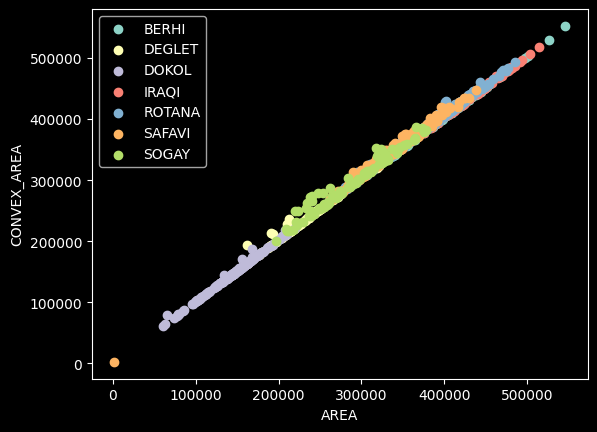

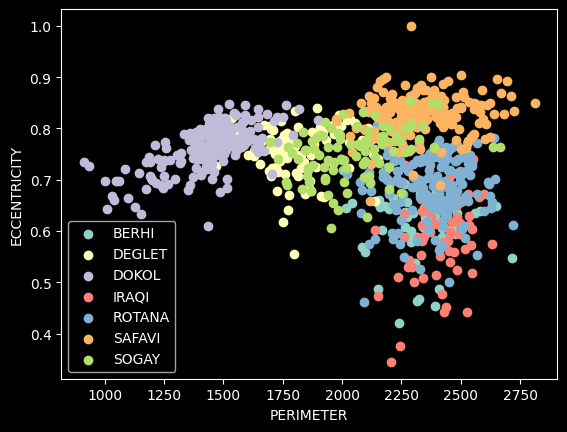

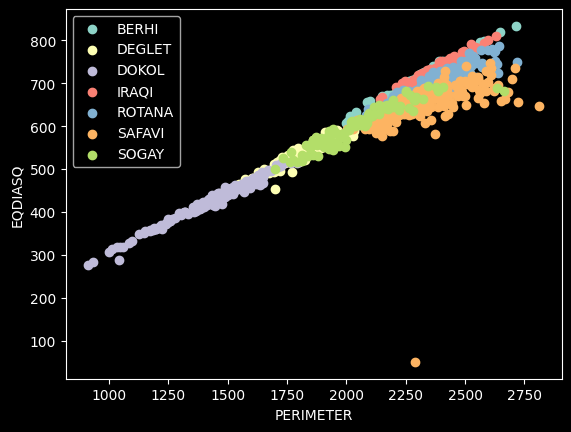

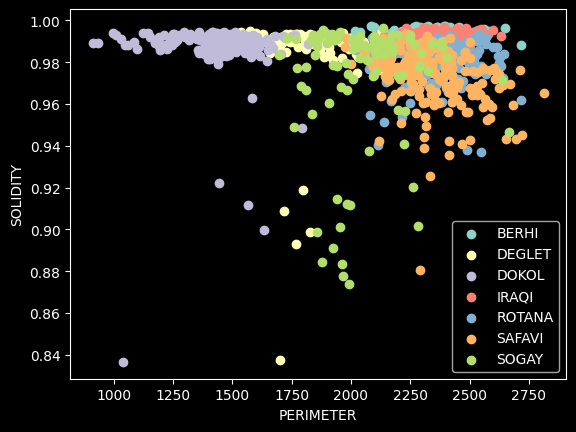

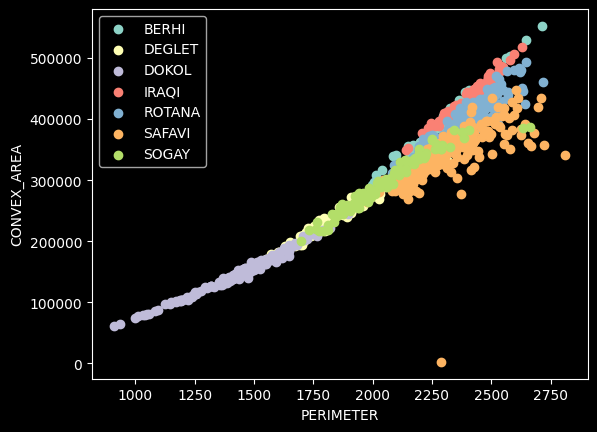

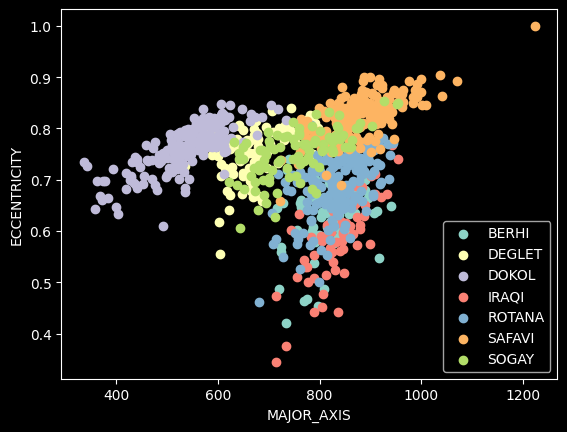

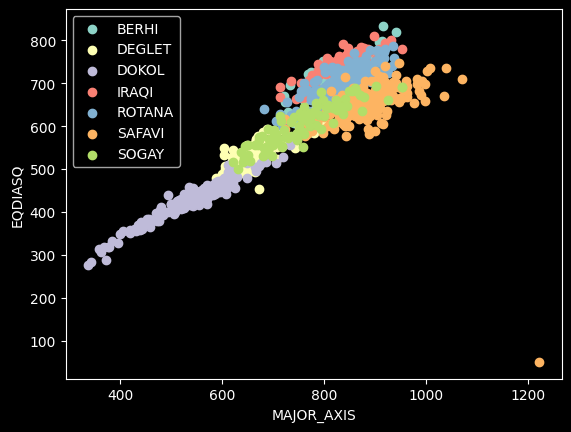

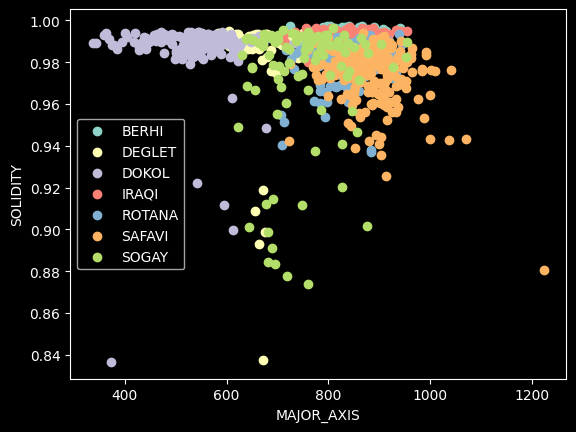

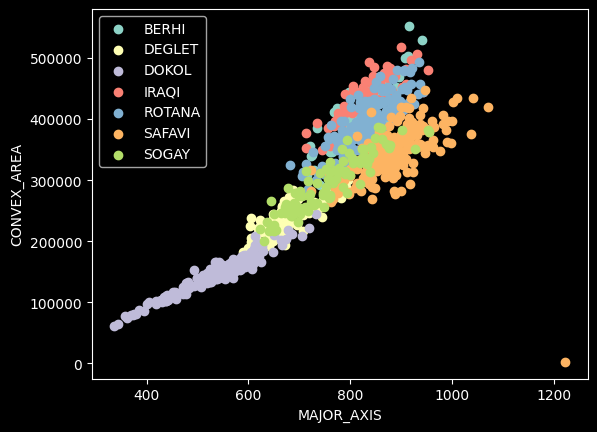

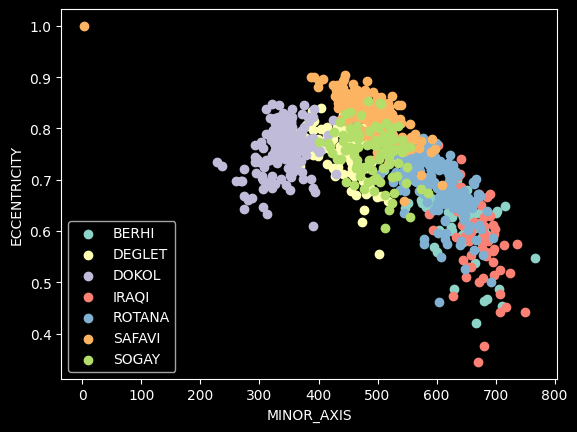

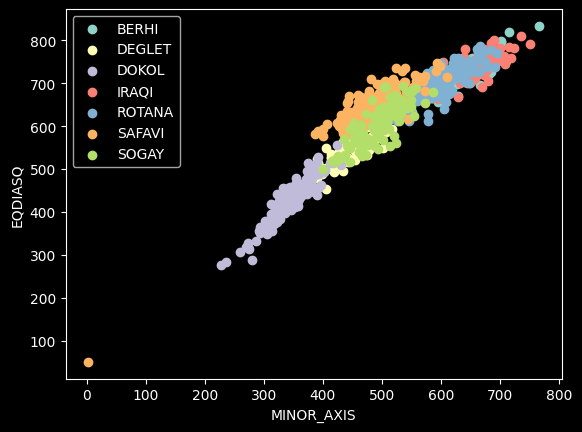

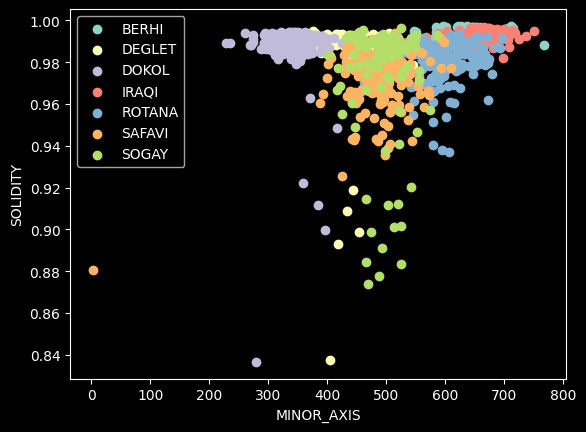

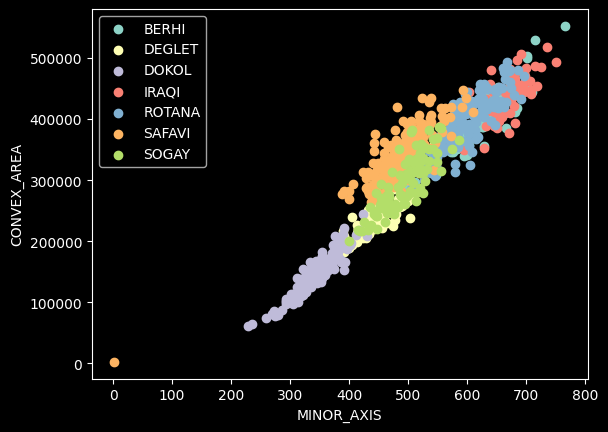

16


In [16]:
# We can plot several properties of the df
c = 0

for prop1 in smallprops[:-4]:
    for prop2 in smallprops[4:]:
        if prop1 != prop2:
            for fruit in fruits:
                X = df[df['Class'] == fruit][prop1]
                Y = df[df['Class'] == fruit][prop2]
                plt.scatter(X, Y, label=fruit)
            plt.xlabel(prop1)
            plt.ylabel(prop2)
            plt.legend()
            plt.show()
            c += 1
            
print(c)



In [17]:
# Constructing a dataframe with few columns

df2 = df[smallprops]
df2

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797
...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795


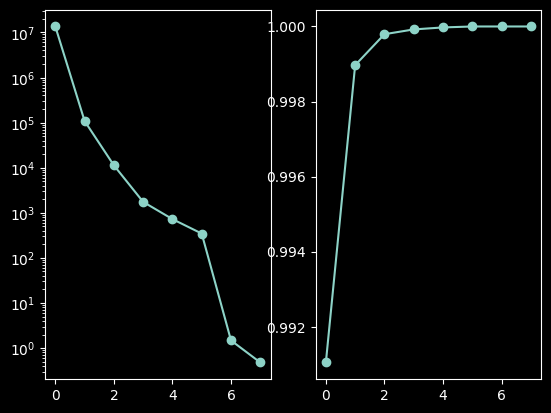

In [18]:
# Now with numpy we investigate the singular value decomposition of the dataframe

import numpy as np
import matplotlib.pyplot as plt

U,S,Vt = np.linalg.svd(df2, full_matrices=0)
#U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o')

In [24]:
# To know the size of the vectors in U and Vt

for i in range(8):
    

8

In [25]:
U.shape

(898, 8)